# Classifying Patients with Diabetes
#### by Nicholas Lugo
#### WGU - Computer Science Capstone - C964

Project Description:


# Importing Needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)

Pandas version: 2.1.4
NumPy version: 1.26.2
Matplotlib version: 3.8.0


# Grabbing the CSV file

In [2]:
df = pd.read_csv("data/diabetes_prediction_dataset.csv")

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Making a data set with diabetic patients only and one without

In [3]:
diabetic = df[df["diabetes"] == True]

non_diabetic = df[df["diabetes"] == False]

# Features include:

* Gender
* Age
* Hypertension (High blood pressure)
* Heart_disease
* Smoking History
* BMI (Body Mass Index)
* HbA1c_level (Long term blood sugar level)
* Blood_Glucose_Level (Blood sugar level when data gathered)
* Diabetes (target 0 = not 1 = has)

# Checking for missing values

In [4]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
# check total number of values in each column
df.count()

gender                 100000
age                    100000
hypertension           100000
heart_disease          100000
smoking_history        100000
bmi                    100000
HbA1c_level            100000
blood_glucose_level    100000
diabetes               100000
dtype: int64

# Exploring the data

1. What am I trying to solve?
   - What features (variables) increase the chances of having diabetes?
   - What population is in the sample (find this out by looking at age and gender)?
   

In [6]:
# checking the datatypes, will need to encode objects later
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [7]:
# quick overview of the data
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
# Check distribution of the target (has diabetes or not)
print("Not diabetic", df["diabetes"].eq(0).sum())
print("Diabetic", df["diabetes"].eq(1).sum())

Not diabetic 91500
Diabetic 8500


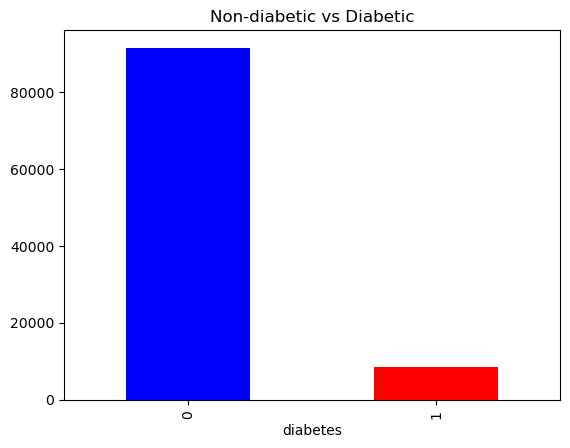

In [9]:
df["diabetes"].value_counts().plot(kind="bar", color=["blue","red"])

plt.title("Non-diabetic vs Diabetic");

In [10]:
print("Percent of dataset with diabetes:", df["diabetes"].eq(1).sum() / df["diabetes"].eq(0).sum() * 100, "%")

Percent of dataset with diabetes: 9.289617486338798 %


Text(0.5, 0, 'Age')

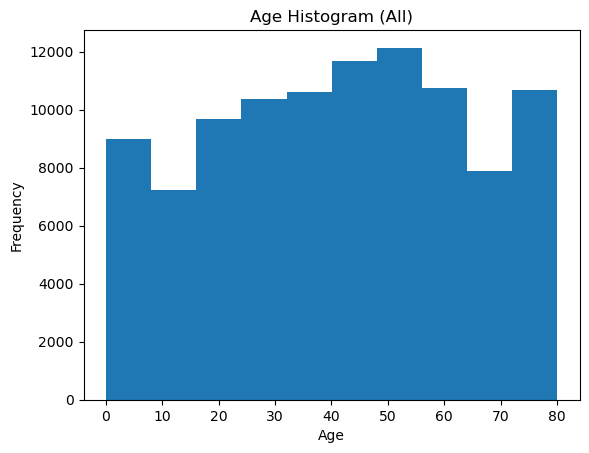

In [11]:
# Histogram for age of patients 
df.age.plot.hist()

plt.title("Age Histogram (All)")
plt.xlabel("Age")
# If you want to save to files, uncomment below
#plt.savefig('age_histogram.png')

#### The study includes a wide range of ages

In [12]:
print("Min age:", df.age.min())
print("Max age:", df.age.max())

Min age: 0.08
Max age: 80.0


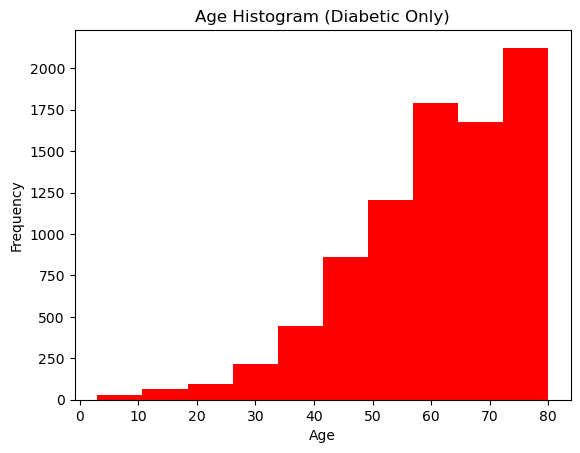

In [13]:
# Histogram for age of patients 
diabetic.age.plot.hist(color="red")

plt.title("Age Histogram (Diabetic Only)")
plt.xlabel("Age");


#### This data shows the older someone is the more likely they are to have diabetes from the patients sampled in this dataset

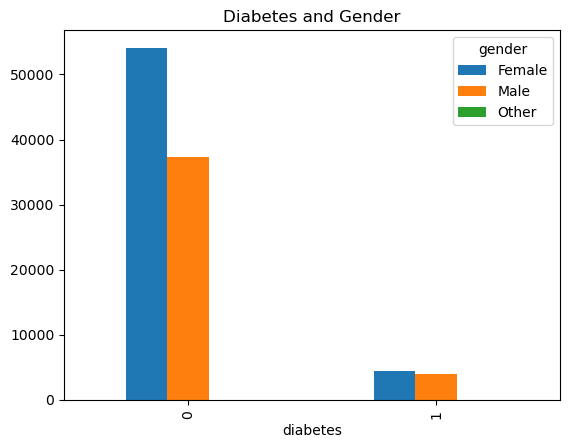

In [14]:
pd.crosstab(df.diabetes, df.gender).plot(kind="bar")

plt.title("Diabetes and Gender");

#### Appears as though men are more likely to have diabetes tha women seeing as there are less men in the sample but they have almost an equal amount of confirmed diabetes. Although the difference doesn't appear to be quite significant

In [15]:
print("Male:", df["gender"].eq("Male").sum())
print("Female:", df["gender"].eq("Female").sum())

Male: 41430
Female: 58552


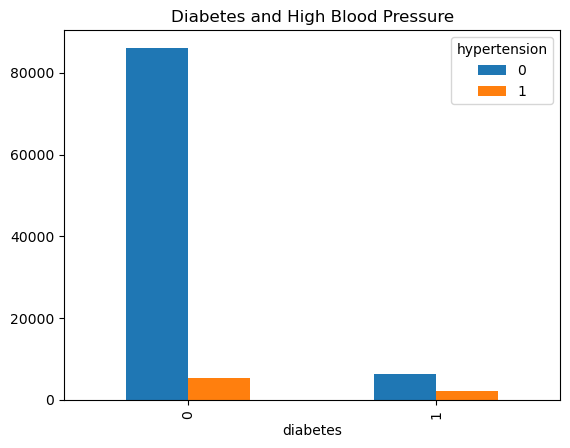

In [16]:
pd.crosstab(df.diabetes, df.hypertension).plot(kind="bar")

plt.title("Diabetes and High Blood Pressure");

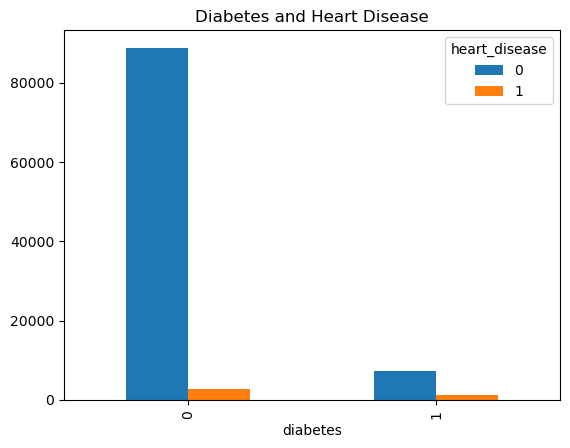

In [17]:
pd.crosstab(df.diabetes, df.heart_disease).plot(kind="bar")

plt.title("Diabetes and Heart Disease");

#### Looks like there isn't a strong relationship between heart disease and diabetes and high blood pressure and diabetes.

In [18]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


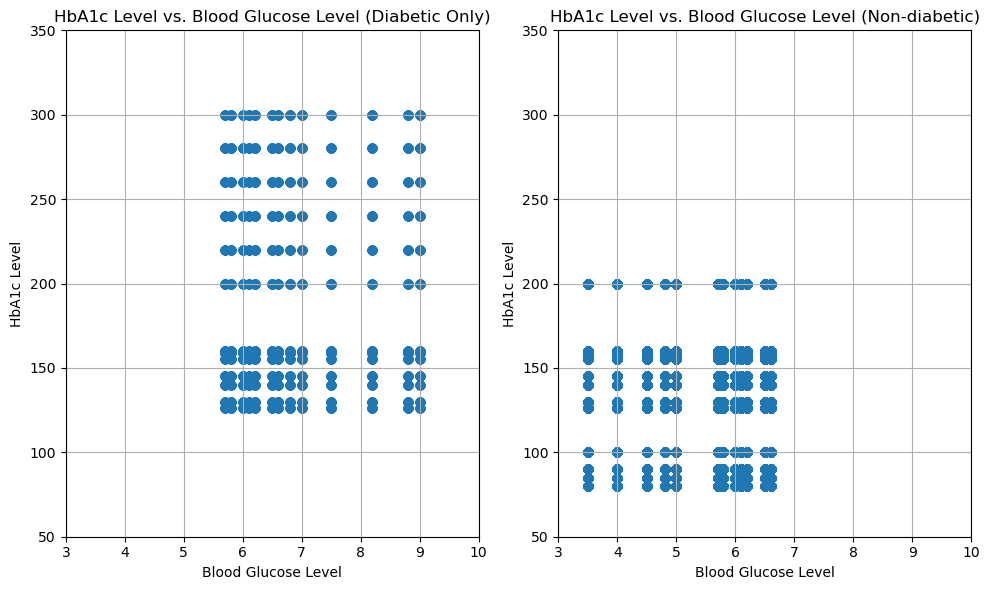

In [19]:
# Set the starting values for x and y axes
start_blood_glucose = 3
start_HbA1c = 50

# Set the end values for x and y axes
end_blood_glucose = 10
end_HbA1c = 350

# Build the scatter plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(diabetic["HbA1c_level"], diabetic["blood_glucose_level"])

# Add labels
plt.title('HbA1c Level vs. Blood Glucose Level (Diabetic Only)')
plt.ylabel('HbA1c Level')
plt.xlabel('Blood Glucose Level')

# Set the starting x and y and end
plt.grid(True)
plt.xlim(start_blood_glucose, end_blood_glucose)
plt.ylim(start_HbA1c, end_HbA1c)

#------------------------------
# Second plot for ALL data
plt.subplot(1, 2, 2)
plt.scatter(non_diabetic["HbA1c_level"], non_diabetic["blood_glucose_level"])
plt.title('HbA1c Level vs. Blood Glucose Level (Non-diabetic)')
plt.ylabel('HbA1c Level')
plt.xlabel('Blood Glucose Level')

# Set intervals and starting point
plt.grid(True)
plt.xlim(start_blood_glucose, end_blood_glucose)
plt.ylim(start_HbA1c, end_HbA1c)


# Show the plots
plt.tight_layout()
#plt.savefig('blood_glucose_scatter.png')
plt.show()

### Findings:

* Patients with diabetes have:
    - a higher starting blood glucose level (x-axis)
    - a higher end blood glucose level
    - higher HbA1c levels across the board shooting past the top of non-diabetic (200)

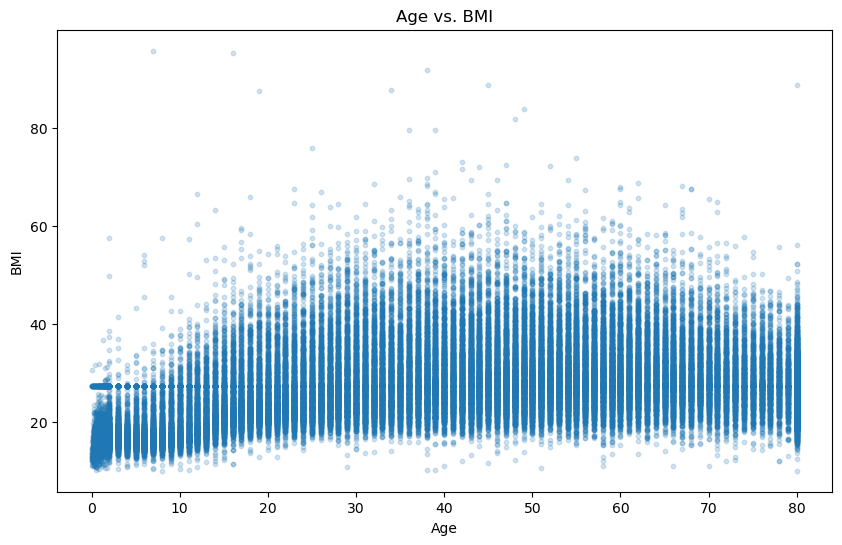

In [20]:
# Build the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['bmi'], alpha=0.2, s=10)

# Add labels and title
plt.title('Age vs. BMI')
plt.xlabel('Age')
plt.ylabel('BMI')

# Show the plot
plt.show()

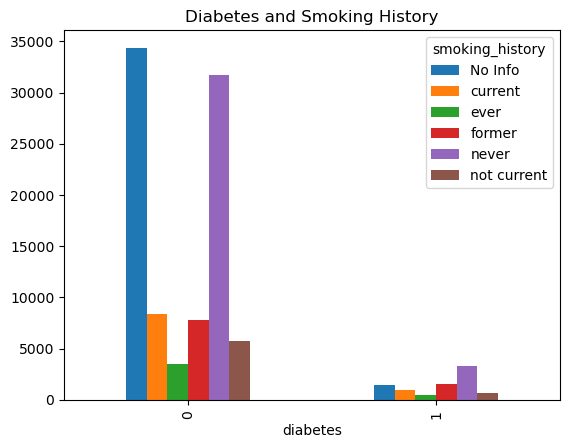

In [21]:
pd.crosstab(df.diabetes, df.smoking_history).plot(kind="bar")

plt.title("Diabetes and Smoking History");

#### Conclusion to data exploration: patients who are older are more likely to be diabetic, blood glucose and HbA1c levels show a very clear difference, gender does not show much of any difference. Also the dataset seems pretty diverse and missing no data (no missing values). Smoking does have many 'No_info' and the connection of diabetes and smoking is unclear and not very evident so this column will probably not be used in my machine learning (too many 'no info' values)

# Cleaning up the data
* Need to fix some data types with encoding in order to begin machine learning.
* Specifically for: gender
* Smoking history as observed above is not very clear data with a lot of 'No info' values so I will be purging that column.

In [22]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [23]:
# Purging out smoking history
cleaned_data = df.drop("smoking_history", axis=1)
cleaned_data.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0


In [24]:
# Turning gender column into numerical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# setting up x and y values for testing later
x = cleaned_data.drop("diabetes", axis=1)
y = cleaned_data["diabetes"]

categorical_features = ["gender"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                              one_hot,
                              categorical_features)],
                              remainder="passthrough")
transformed = transformer.fit_transform(x)
transformed

array([[  1.  ,   0.  ,   0.  , ...,  25.19,   6.6 , 140.  ],
       [  1.  ,   0.  ,   0.  , ...,  27.32,   6.6 ,  80.  ],
       [  0.  ,   1.  ,   0.  , ...,  27.32,   5.7 , 158.  ],
       ...,
       [  0.  ,   1.  ,   0.  , ...,  27.83,   5.7 , 155.  ],
       [  1.  ,   0.  ,   0.  , ...,  35.42,   4.  , 100.  ],
       [  1.  ,   0.  ,   0.  , ...,  22.43,   6.6 ,  90.  ]])

In [25]:
x_transformed = pd.DataFrame(transformed)
x_transformed.head()

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,80.0,0.0,1.0,25.19,6.6,140.0
1,1.0,0.0,0.0,54.0,0.0,0.0,27.32,6.6,80.0
2,0.0,1.0,0.0,28.0,0.0,0.0,27.32,5.7,158.0
3,1.0,0.0,0.0,36.0,0.0,0.0,23.45,5.0,155.0
4,0.0,1.0,0.0,76.0,1.0,1.0,20.14,4.8,155.0


In [26]:
x_transformed.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
dtype: object

In [27]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Machine Learning
* Make test and train data set
* Fit the model
* Make Predictions

In [28]:
# Import train test split to make testing and training set
from sklearn.model_selection import train_test_split

# set a seed for replicating results
np.random.seed(100)

# make the training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(x_transformed,
                                                    y,
                                                    test_size=0.2)

In [29]:
# Using RandomForestClassifier because it is great at unbalanced datasets such as ours- only ~9% of the data is positive, rest negative for diabetes
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# Train the model
clf.fit(x_train, y_train)

# Score the model's ability
clf.score(x_test, y_test)

0.9687

#### 96.9% accuracy on making predictions

In [30]:
# cross validating the data with 5-fold validation
cross_val_score(clf, x_transformed, y, cv=5)

array([0.9693 , 0.96955, 0.9665 , 0.9693 , 0.9692 ])

In [31]:
# Making predictions with the x test set
y_preds = clf.predict(x_test)

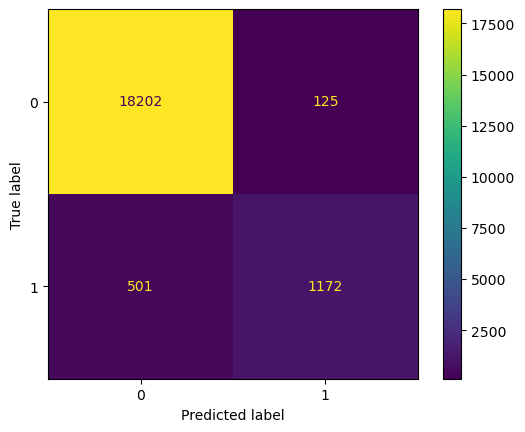

In [32]:
# making a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds);
#plt.savefig('confusion_matrix_predictions.png')

In [33]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# Make a prediction!
* The last cell is for you to make your prediction the one immediately below this is an example for you to look at.
* The last cell will have an error until all values are filled out.


In [34]:
# Enter your variables below to make predictions
isFemale = 1             # 1 for yes 0 for no
isMale =    0           # 1 for yes 0 for no
isOther =    0          # 1 for yes 0 for no
age =         80         # enter 1 - 100
hasHypertension = 1     # 1 for yes 0 for no
hasHeart_disease = 0    # 1 for yes 0 for no
bmi =              30    # enter a value between 10.0 and 100.0
hba1c_level =        5  # enter a value between 3.0 and 9.0
blood_glucose_level = 300 # enter a value between 80 and 300
input_data = [[isFemale, isMale, isOther, age, hasHypertension, hasHeart_disease, bmi, hba1c_level, blood_glucose_level]]

# Make predictions
predictions = clf.predict(input_data)

# Print predictions
print("Predictions:", predictions)
print("1 means predicted to have diabetes and 0 means does not.")

Predictions: [1]
1 means predicted to have diabetes and 0 means does not.


In [35]:
# Use this cell to make a prediction

# Enter your variables below to make predictions
isFemale =             # 1 for yes 0 for no
isMale =               # 1 for yes 0 for no
isOther =              # 1 for yes 0 for no
age =                  # enter 1 - 100
hasHypertension =      # 1 for yes 0 for no
hasHeart_disease =     # 1 for yes 0 for no
bmi =                  # enter a value between 10.0 and 100.0
hba1c_level =          # enter a value between 3.0 and 9.0
blood_glucose_level =  # enter a value between 80 and 300

# Loads the data into the proper format to run through for predictions
input_data = [[isFemale, isMale, isOther, age, hasHypertension, hasHeart_disease, bmi, hba1c_level, blood_glucose_level]]

# Make predictions
predictions = clf.predict(input_data)

# Print predictions
print("Predictions:", predictions)
print("1 means predicted to have diabetes and 0 means does not")


SyntaxError: invalid syntax (1864325073.py, line 4)